In [38]:
# imports
import numpy as np
import matplotlib.pyplot as plt

Now we need to simulate realistic data, the model will use hours studied data to train and predict if a student will pass

Question:
1. What is a bias term?
    - In machine learning, a bias term is like the starting point or offset in your model’s predictions—it's what allows the model to make a non-zero prediction even when all input features are zero.
    - Think of it this way: if you're predicting test scores based on study hours, but even someone who studied zero hours still scores a few points just for showing up, the bias accounts for that baseline value.

In [39]:
# Each row: [hours_studied], label: 1 = pass, 0 = fail
study_hours = np.array([0.5, 1.0, 1.5, 2.0, 3.0, 3.5, 4.5, 5.0, 6.0, 6.5])
# print(study_hours)
# print(study_hours.reshape(-1, 1))
labels = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # 0 = fail, 1 = pass

# Add bias term
# np.ones creates a numpy array, a column vector with every element set to 1
# np.c_ combines the 2 arrays

# print(np.ones((len(study_hours), 1)))
X = np.c_[np.ones((len(study_hours), 1)), study_hours.reshape(-1, 1)]
# print(X)

# same thing here, it takes the labels which is a flat list, turns it into a column
# print(labels)
y = labels.reshape(-1, 1)
Y = np.c_[np.ones((len(y), 1)), y]
print(y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


Questions to ask:
1. What does `X.reshape(-1, 1)` do?
    - It transforms a one-dimensional array into a two-dimensional column vector. That -1 is Python shorthand—it tells NumPy, “You figure out the right number of rows based on the length of the array.”
    - So instead of a flat row of values, you now have (n) rows and one column. This is super useful when preparing data for machine learning, where models expect 2D input (even if there's only one feature).
    - see above print outputs
2. What does `np.ones` do?
    - np.ones() creates a new numpy array in the dimensions specified `np.ones(3, 1)` will be a `3 x 1` array. This is a column vector where every element is 1
    - in our case it will create the same number of elements in the array as the `len(study_hours)`, the value of each element will be set to 1
3. What does `np.c_` do?
    - In NumPy, `np.c_[]` is a handy shortcut for concatenating arrays along the second axis (columns)—think of it like sticking arrays side by side horizontally.
    - It's often used to add a bias term (a column of 1s) or to combine multiple 1D arrays into a 2D matrix.
4. Why are we turning a flat array into a column of values in the code example. What are the benefits? is it absolutely necessary
    - Reshaping a flat array into a column isn't always absolutely necessary, but in many cases (especially in machine learning), it really helps everything play nicely.
    - A flat array like this `np.array([1, 2, 3])` has shape (3,), meaning it's 1D with 3 elements. But machine learning models, matrix operations, and broadcasting rules often expect 2D arrays where each row is a sample and each column is a feature.
    - So reshaping it X = X.reshape(-1, 1) turns it into a vector making it
```
    [[1],
     [2],
     [3]]
row         col(feature: name)          col(feature: age)           col (feature: salary)
1           owen                        42                          R2500
```

NB!!! See output above to make sense

Next step is to define the sigmoid, loss, and training

In [40]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def loss(y_true, y_pred):
    epsilon = 1e-10
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

def train(X, y, lr=0.1, epochs=1000):
    weights = np.zeros((X.shape[1], 1))
    for _ in range(epochs):
        z = X @ weights
        pred = sigmoid(z)
        gradient = X.T @ (pred - y) / len(y)
        weights -= lr * gradient
    return weights

Questions:
1. What does `epsilon = 1e-10` do?
    - It creates a very small number. It's used in the loss function to avoid a mathematical disaster—specifically, taking the logarithm of zero
2. What are `epochs` in the code?
    - In our example, `epochs` refer to the number of full passes your model makes through the entire dataset during training.
    - Imagine teaching a dog a trick: one epoch is like walking through the full lesson plan once—repeating the training examples and updating the model’s "understanding" based on the errors it makes.
    
Now we need to train the model

In [41]:
weights = train(X, y)

def predict(X, weights):
    return sigmoid(X @ weights) >= 0.5

Now we visualize the results

Questions:
1. What is linspace()
2. What does reshape() do?
3. What does this line do? y_vals = sigmoid(x_plot @ weights)


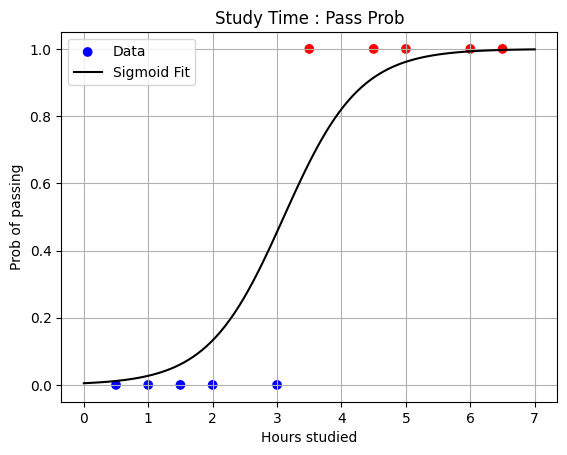

In [42]:
x_vals = np.linspace(0, 7, 100)
x_plot = np.c_[np.ones((len(x_vals), 1)), x_vals.reshape(-1, 1)]
y_vals = sigmoid(x_plot @ weights)

plt.scatter(study_hours, labels, c=labels.ravel(), cmap='bwr', label='Data')
plt.plot(x_vals, y_vals, color='black', label='Sigmoid Fit')
plt.xlabel("Hours studied")
plt.ylabel("Prob of passing")
plt.title("Study Time : Pass Prob")
plt.legend()
plt.grid(True)
plt.show()

Now we are going to try to predict using 15 hours of study and a bias of 1 to stop a true 0 for happening

In [44]:
# New data: 15 hours of study
new_study = np.array([[1, 4]])

# Use the sigmoig to get the probability
prob = sigmoid(new_study @ weights)
print("Probability of passing: ", prob[0][0])
print(prob)

# Use the predict function to classify
outcome = predict(new_study, weights)
print("Predicted outcome (1 = pass, 0 = fail):", int(outcome[0][0]))

Probability of passing:  0.820937457295982
[[0.82093746]]
Predicted outcome (1 = pass, 0 = fail): 1
